In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.losses.numpy import mae
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer, FEDformer, PatchTST
from neuralforecast.models import LSTM, TCN, NHITS

C:\Users\USER\anaconda3\lib\site-packages\torchaudio\backend\utils.py:62: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [2]:
data_gold = pd.read_csv('gold.csv')
data_silver = pd.read_csv('silver.csv')
data_platinum = pd.read_csv('platinum.csv')

In [3]:
def standard_scaler(data):
    mean = data['y'].mean()
    std = data['y'].std()
    data['y'] = (data['y']-mean)/std
    return mean, std, data

In [4]:
mean_gold, std_gold, data_gold = standard_scaler(data_gold)
mean_silver, std_silver, data_silver = standard_scaler(data_silver)
mean_platinum, std_platinum, data_platinum = standard_scaler(data_platinum)

In [5]:
data = pd.concat([data_gold,data_silver])
data

,ds,y,unique_id
0,0,-1.336501,gold
1,1,-1.323519,gold
2,2,-1.260577,gold
3,3,-1.291655,gold
4,4,-1.246415,gold
...,...,...,...
1285,1285,0.951773,silver
1286,1286,0.983087,silver
1287,1287,0.920697,silver
1288,1288,0.968616,silver


In [6]:
horizon = 5

In [7]:
%%capture
models_nn = [LSTM(h=horizon,                 # Forecasting horizon
                  input_size=10,         # Input size
                  max_steps=2000,               # Number of training iterations
                  val_check_steps=100,          # Compute validation loss every 100 steps
                  early_stop_patience_steps=3), # Stop training if validation loss does not improve
            TCN(h=horizon,
                  input_size=10,
                  max_steps=2000,
                  val_check_steps=100,
                  early_stop_patience_steps=3),
            NHITS(h=horizon,
                  input_size=30,
                  max_steps=1000,
                  val_check_steps=100,
                  early_stop_patience_steps=3)
            ]  

Global seed set to 1
Global seed set to 1
Global seed set to 1


In [8]:
nn = NeuralForecast(models=models_nn, freq='D')

data_nn = nn.cross_validation(df=data,
                              val_size=int(.1*len(data.ds.unique())),
                              test_size=int(.1*len(data.ds.unique())),
                              n_windows=None)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

In [9]:
data_nn

,unique_id,ds,cutoff,LSTM,TCN,NHITS,y
0,gold,1161,1160,1.072331,0.562082,1.152888,1.150495
1,gold,1162,1160,1.081150,0.440767,1.199055,1.153642
2,gold,1163,1160,1.070780,0.497719,1.256439,1.181573
3,gold,1164,1160,1.081998,0.497929,1.278867,1.174098
4,gold,1165,1160,1.117674,0.461329,1.265884,1.215010
...,...,...,...,...,...,...,...
1245,silver,1285,1284,0.911332,0.446678,1.018301,0.951773
1246,silver,1286,1284,0.914316,0.373145,0.970077,0.983087
1247,silver,1287,1284,0.914052,0.413507,0.948310,0.920697
1248,silver,1288,1284,0.917396,0.415761,0.949360,0.968616


In [10]:
nn_predict = data_nn[data_nn['ds']-data_nn['cutoff']==horizon]
nn_predict

,unique_id,ds,cutoff,LSTM,TCN,NHITS,y
4,gold,1165,1160,1.117674,0.461329,1.265884,1.215010
9,gold,1166,1161,1.160754,0.475468,1.282954,1.196521
14,gold,1167,1162,1.161957,0.481092,1.276198,1.212257
19,gold,1168,1163,1.191674,0.492107,1.287066,1.271658
24,gold,1169,1164,1.183920,0.495152,1.287501,1.287394
...,...,...,...,...,...,...,...
1229,silver,1285,1280,0.851423,0.333697,0.948630,0.951773
1234,silver,1286,1281,0.785343,0.324516,0.902507,0.983087
1239,silver,1287,1282,0.851526,0.340477,0.937221,0.920697
1244,silver,1288,1283,0.921256,0.363834,0.950606,0.968616


In [11]:
nn_gold = nn_predict[nn_predict['unique_id']=='gold']
nn_silver = nn_predict[nn_predict['unique_id']=='silver']

In [12]:
nn_gold

,unique_id,ds,cutoff,LSTM,TCN,NHITS,y
4,gold,1165,1160,1.117674,0.461329,1.265884,1.215010
9,gold,1166,1161,1.160754,0.475468,1.282954,1.196521
14,gold,1167,1162,1.161957,0.481092,1.276198,1.212257
19,gold,1168,1163,1.191674,0.492107,1.287066,1.271658
24,gold,1169,1164,1.183920,0.495152,1.287501,1.287394
...,...,...,...,...,...,...,...
604,gold,1285,1280,1.204164,0.475744,1.246203,1.207929
609,gold,1286,1281,1.155458,0.471701,1.209743,1.216191
614,gold,1287,1282,1.135968,0.465264,1.174220,1.196128
619,gold,1288,1283,1.196415,0.477263,1.191600,1.228779


In [13]:
nn_gold[['LSTM','TCN','NHITS','y']] = nn_gold[['LSTM','TCN','NHITS','y']]*std_gold + mean_gold
nn_silver[['LSTM','TCN','NHITS','y']] = nn_silver[['LSTM','TCN','NHITS','y']]*std_silver + mean_silver

In [14]:
nf = NeuralForecast(models=models_nn, freq='D')

data_nn = nf.cross_validation(df=data_platinum,
                               val_size=int(.1*len(data_platinum.ds.unique())),
                               test_size=int(.1*len(data_platinum.ds.unique())),
                               n_windows=None)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

In [15]:
data_nn

,unique_id,ds,cutoff,LSTM,TCN,NHITS,y
0,platinum,1402,1401,1.020518,1.733962,1.580966,1.355287
1,platinum,1403,1401,1.025958,1.621011,1.944793,1.483643
2,platinum,1404,1401,1.013585,1.499903,2.413903,1.321842
3,platinum,1405,1401,1.092464,1.727474,2.809483,1.302860
4,platinum,1406,1401,1.060787,1.723135,2.756492,1.235970
...,...,...,...,...,...,...,...
750,platinum,1552,1551,0.260756,0.424987,0.410774,0.300418
751,platinum,1553,1551,0.253098,0.422504,0.354984,0.379963
752,platinum,1554,1551,0.249977,0.413691,0.059507,0.288667
753,platinum,1555,1551,0.278902,0.432916,-0.098633,0.242567


In [16]:
nn_platinum = data_nn[data_nn['ds']-data_nn['cutoff']==horizon]
nn_platinum

,unique_id,ds,cutoff,LSTM,TCN,NHITS,y
4,platinum,1406,1401,1.060787,1.723135,2.756492,1.235970
9,platinum,1407,1402,1.095181,1.820164,2.495272,1.427600
14,platinum,1408,1403,1.162285,1.961641,2.291236,1.430312
19,platinum,1409,1404,1.093195,1.873406,1.827775,1.674369
24,platinum,1410,1405,1.077260,1.861631,1.752406,1.567707
...,...,...,...,...,...,...,...
734,platinum,1552,1547,-0.120314,0.035146,0.300318,0.300418
739,platinum,1553,1548,-0.102138,0.003617,0.276467,0.379963
744,platinum,1554,1549,0.263659,0.336833,0.240643,0.288667
749,platinum,1555,1550,0.311789,0.432383,0.065855,0.242567


In [17]:
nn_platinum[['LSTM','TCN','NHITS','y']] = nn_platinum[['LSTM','TCN','NHITS','y']]*std_platinum + mean_platinum

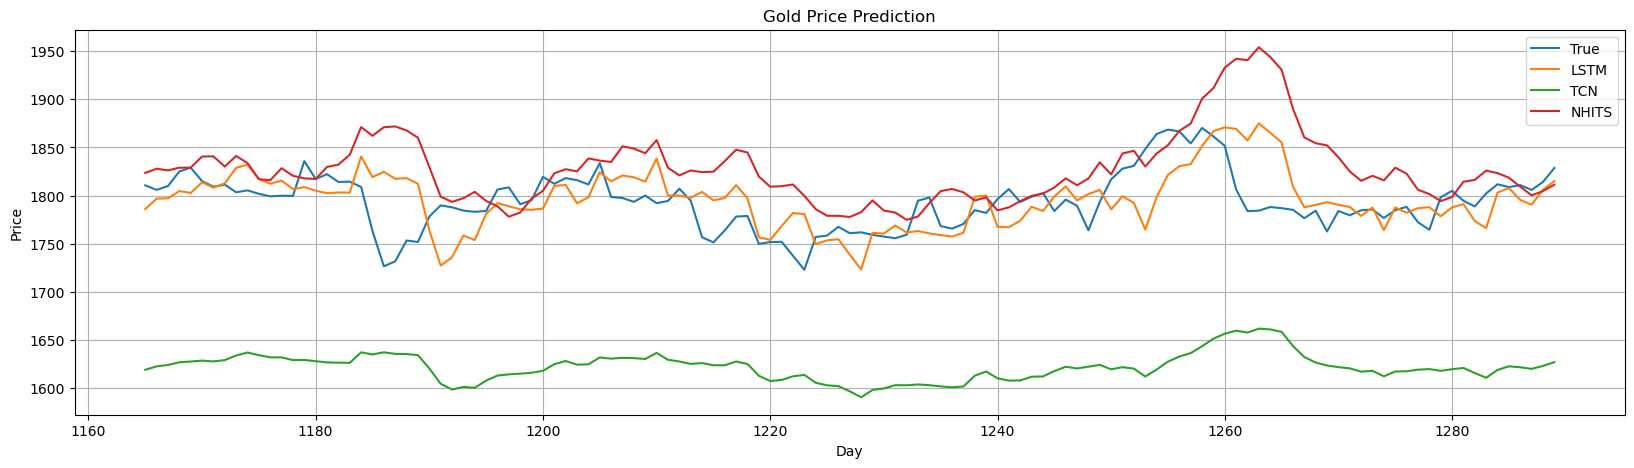

In [18]:
plt.figure(figsize=(20,5))
plt.plot(nn_gold['ds'], nn_gold['y'], label='True')
plt.plot(nn_gold['ds'], nn_gold['LSTM'], label='LSTM')
plt.plot(nn_gold['ds'], nn_gold['TCN'], label='TCN')
plt.plot(nn_gold['ds'], nn_gold['NHITS'], label='NHITS')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Gold Price Prediction')
plt.grid()
plt.legend()
plt.savefig('gold_nn_5step.png')
plt.show()

In [19]:
mae_lstm = mae(nn_gold['y'], nn_gold['LSTM'])
mae_tcn = mae(nn_gold['y'], nn_gold['TCN'])
mae_nhits = mae(nn_gold['y'], nn_gold['NHITS'])

print(f'LSTM: {mae_lstm:.3f}')
print(f'TCN: {mae_tcn:.3f}')
print(f'NHITS: {mae_nhits:.3f}')

LSTM: 23.679
TCN: 171.746
NHITS: 37.711


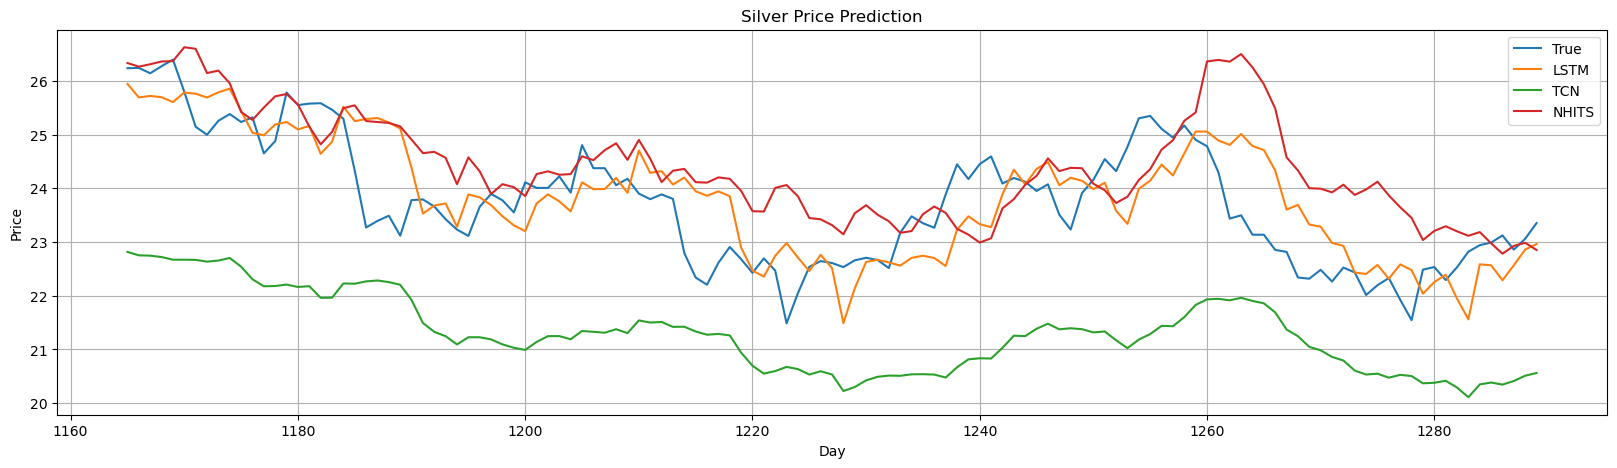

In [20]:
plt.figure(figsize=(20,5))
plt.plot(nn_silver['ds'], nn_silver['y'], label='True')
plt.plot(nn_silver['ds'], nn_silver['LSTM'], label='LSTM')
plt.plot(nn_silver['ds'], nn_silver['TCN'], label='TCN')
plt.plot(nn_silver['ds'], nn_silver['NHITS'], label='NHITS')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Silver Price Prediction')
plt.grid()
plt.legend()
plt.savefig('silver_nn_5step.png')
plt.show()

In [21]:
mae_lstm = mae(nn_silver['y'], nn_silver['LSTM'])
mae_tcn = mae(nn_silver['y'], nn_silver['TCN'])
mae_nhits = mae(nn_silver['y'], nn_silver['NHITS'])

print(f'LSTM: {mae_lstm:.3f}')
print(f'TCN: {mae_tcn:.3f}')
print(f'NHITS: {mae_nhits:.3f}')

LSTM: 0.627
TCN: 2.439
NHITS: 0.914


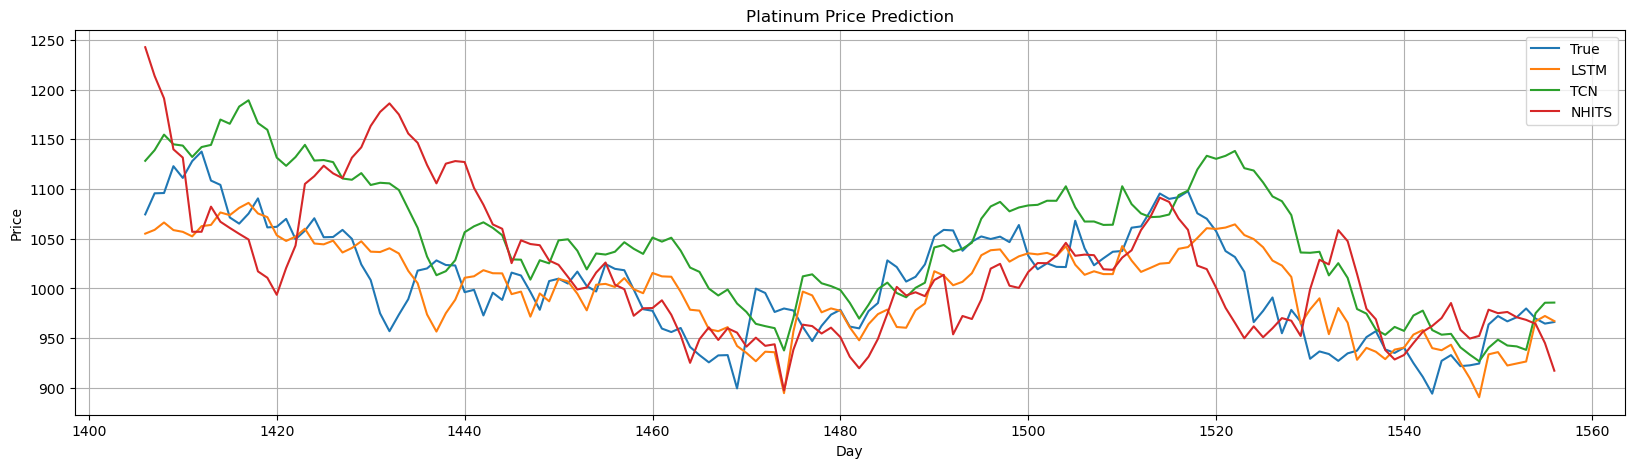

In [22]:
plt.figure(figsize=(20,5))
plt.plot(nn_platinum['ds'], nn_platinum['y'], label='True')
plt.plot(nn_platinum['ds'], nn_platinum['LSTM'], label='LSTM')
plt.plot(nn_platinum['ds'], nn_platinum['TCN'], label='TCN')
plt.plot(nn_platinum['ds'], nn_platinum['NHITS'], label='NHITS')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Platinum Price Prediction')
plt.grid()
plt.legend()
plt.savefig('platinum_nn_5step.png')
plt.show()

In [23]:
mae_lstm = mae(nn_platinum['y'], nn_platinum['LSTM'])
mae_tcn = mae(nn_platinum['y'], nn_platinum['TCN'])
mae_nhits = mae(nn_platinum['y'], nn_platinum['NHITS'])

print(f'LSTM: {mae_lstm:.3f}')
print(f'TCN: {mae_tcn:.3f}')
print(f'NHITS: {mae_nhits:.3f}')

LSTM: 29.319
TCN: 48.192
NHITS: 45.243


In [24]:
%%capture
models_tf = [Informer(h=horizon,                 # Forecasting horizon
                      input_size=10,         # Input size
                      max_steps=2000,               # Number of training iterations
                      val_check_steps=100,          # Compute validation loss every 100 steps
                      early_stop_patience_steps=3), # Stop training if validation loss does not improve
             Autoformer(h=horizon,
                        input_size=30,
                        max_steps=1000,
                        val_check_steps=100,
                        early_stop_patience_steps=3),
             PatchTST(h=horizon,
                        input_size=30,
                        max_steps=1000,
                        val_check_steps=100,
                        early_stop_patience_steps=3),
             ]

Global seed set to 1
Global seed set to 1
Global seed set to 1


In [25]:
tf = NeuralForecast(models=models_tf, freq='D')

data_tf = tf.cross_validation(df=data,
                               val_size=int(.1*len(data.ds.unique())),
                               test_size=int(.1*len(data.ds.unique())),
                               n_windows=None)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

In [26]:
data_tf

,unique_id,ds,cutoff,Informer,Autoformer,PatchTST,y
0,gold,1161,1160,1.112688,1.125168,1.109698,1.150495
1,gold,1162,1160,1.152234,1.121577,1.146518,1.153642
2,gold,1163,1160,1.172107,1.139557,1.185807,1.181573
3,gold,1164,1160,1.149264,1.178442,1.175624,1.174098
4,gold,1165,1160,1.105193,1.079874,1.173514,1.215010
...,...,...,...,...,...,...,...
1245,silver,1285,1284,0.890408,0.736271,0.918950,0.951773
1246,silver,1286,1284,0.899774,0.682323,0.910895,0.983087
1247,silver,1287,1284,0.904407,0.654477,0.901549,0.920697
1248,silver,1288,1284,0.898945,0.605427,0.902976,0.968616


In [27]:
tf_predict = data_tf[data_tf['ds']-data_tf['cutoff']==horizon]
tf_predict

,unique_id,ds,cutoff,Informer,Autoformer,PatchTST,y
4,gold,1165,1160,1.105193,1.079874,1.173514,1.215010
9,gold,1166,1161,1.134051,1.111455,1.209516,1.196521
14,gold,1167,1162,1.132951,1.140484,1.188946,1.212257
19,gold,1168,1163,1.145829,1.205763,1.213102,1.271658
24,gold,1169,1164,1.143857,1.118677,1.216107,1.287394
...,...,...,...,...,...,...,...
1229,silver,1285,1280,0.871654,1.029925,0.853506,0.951773
1234,silver,1286,1281,0.799533,0.977961,0.779830,0.983087
1239,silver,1287,1282,0.821041,1.009773,0.801868,0.920697
1244,silver,1288,1283,0.884571,0.718726,0.858944,0.968616


In [28]:
tf_gold = tf_predict[tf_predict['unique_id']=='gold']
tf_silver = tf_predict[tf_predict['unique_id']=='silver']

In [29]:
tf_gold

,unique_id,ds,cutoff,Informer,Autoformer,PatchTST,y
4,gold,1165,1160,1.105193,1.079874,1.173514,1.215010
9,gold,1166,1161,1.134051,1.111455,1.209516,1.196521
14,gold,1167,1162,1.132951,1.140484,1.188946,1.212257
19,gold,1168,1163,1.145829,1.205763,1.213102,1.271658
24,gold,1169,1164,1.143857,1.118677,1.216107,1.287394
...,...,...,...,...,...,...,...
604,gold,1285,1280,1.182967,1.317889,1.184726,1.207929
609,gold,1286,1281,1.150673,1.137106,1.127974,1.216191
614,gold,1287,1282,1.126660,1.184169,1.093197,1.196128
619,gold,1288,1283,1.158376,1.129824,1.133875,1.228779


In [30]:
tf_gold[['Informer','Autoformer','PatchTST','y']] = tf_gold[['Informer','Autoformer','PatchTST','y']]*std_gold + mean_gold
tf_silver[['Informer','Autoformer','PatchTST','y']] = tf_silver[['Informer','Autoformer','PatchTST','y']]*std_silver + mean_silver

In [31]:
tf = NeuralForecast(models=models_tf, freq='D')

data_tf = tf.cross_validation(df=data_platinum,
                               val_size=int(.1*len(data_platinum.ds.unique())),
                               test_size=int(.1*len(data_platinum.ds.unique())),
                               n_windows=None)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

In [32]:
data_tf

,unique_id,ds,cutoff,Informer,Autoformer,PatchTST,y
0,platinum,1402,1401,1.381332,1.305883,1.238644,1.355287
1,platinum,1403,1401,1.472815,1.485203,1.174639,1.483643
2,platinum,1404,1401,1.447437,1.684340,1.217823,1.321842
3,platinum,1405,1401,1.556046,1.830767,1.213335,1.302860
4,platinum,1406,1401,1.598998,1.647407,1.256819,1.235970
...,...,...,...,...,...,...,...
750,platinum,1552,1551,0.278638,0.114904,0.291791,0.300418
751,platinum,1553,1551,0.282214,-0.019596,0.278967,0.379963
752,platinum,1554,1551,0.265998,-0.075998,0.278297,0.288667
753,platinum,1555,1551,0.208330,-0.111719,0.290174,0.242567


In [33]:
tf_platinum = data_tf[data_tf['ds']-data_tf['cutoff']==horizon]
tf_platinum

,unique_id,ds,cutoff,Informer,Autoformer,PatchTST,y
4,platinum,1406,1401,1.598998,1.647407,1.256819,1.235970
9,platinum,1407,1402,1.521298,1.854965,1.385694,1.427600
14,platinum,1408,1403,1.599122,1.889516,1.511705,1.430312
19,platinum,1409,1404,1.472719,1.739083,1.314265,1.674369
24,platinum,1410,1405,1.416785,1.651305,1.269387,1.567707
...,...,...,...,...,...,...,...
734,platinum,1552,1547,-0.082104,0.085904,-0.010802,0.300418
739,platinum,1553,1548,0.143577,-0.307086,-0.012905,0.379963
744,platinum,1554,1549,0.581838,-0.183407,0.263086,0.288667
749,platinum,1555,1550,0.067772,-0.150931,0.356730,0.242567


In [34]:
tf_platinum[['Informer','Autoformer','PatchTST','y']] = tf_platinum[['Informer','Autoformer','PatchTST','y']]*std_platinum + mean_platinum

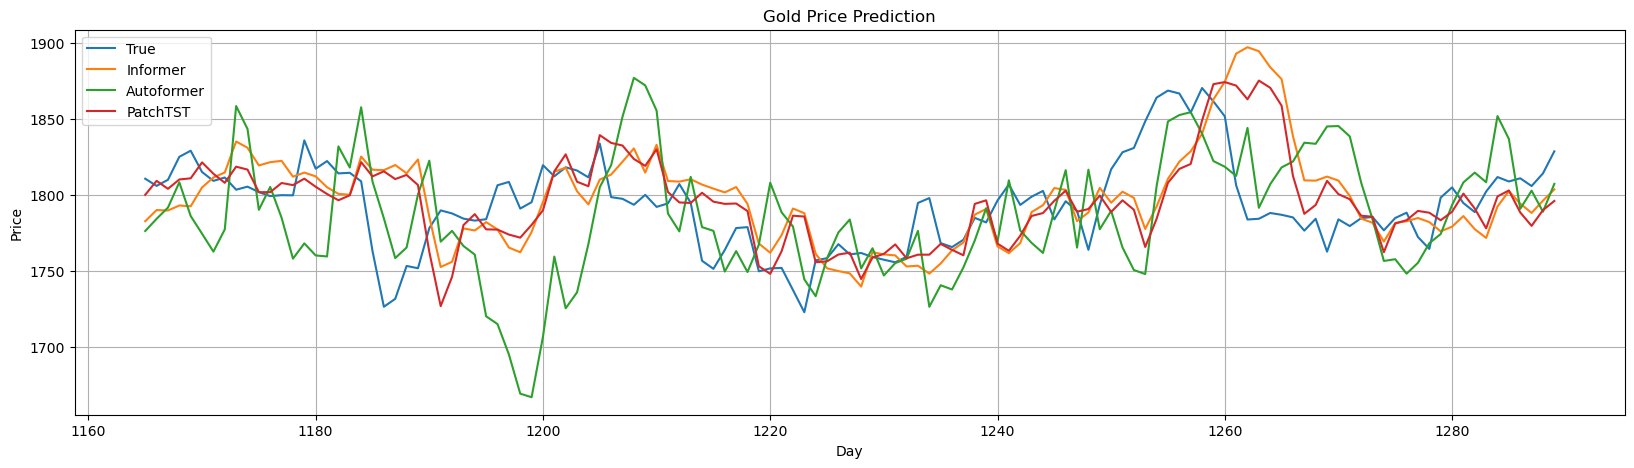

In [35]:
plt.figure(figsize=(20,5))
plt.plot(tf_gold['ds'], tf_gold['y'], label='True')
plt.plot(tf_gold['ds'], tf_gold['Informer'], label='Informer')
plt.plot(tf_gold['ds'], tf_gold['Autoformer'], label='Autoformer')
plt.plot(tf_gold['ds'], tf_gold['PatchTST'], label='PatchTST')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Gold Price Prediction')
plt.grid()
plt.legend()
plt.savefig('gold_tf_5step.png')
plt.show()

In [36]:
mae_lstm = mae(tf_gold['y'], tf_gold['Informer'])
mae_tcn = mae(tf_gold['y'], tf_gold['Autoformer'])
mae_nhits = mae(tf_gold['y'], tf_gold['PatchTST'])

print(f'Informer: {mae_lstm:.3f}')
print(f'Autoformer: {mae_tcn:.3f}')
print(f'PatchTST: {mae_nhits:.3f}')

Informer: 26.296
Autoformer: 34.690
PatchTST: 22.784


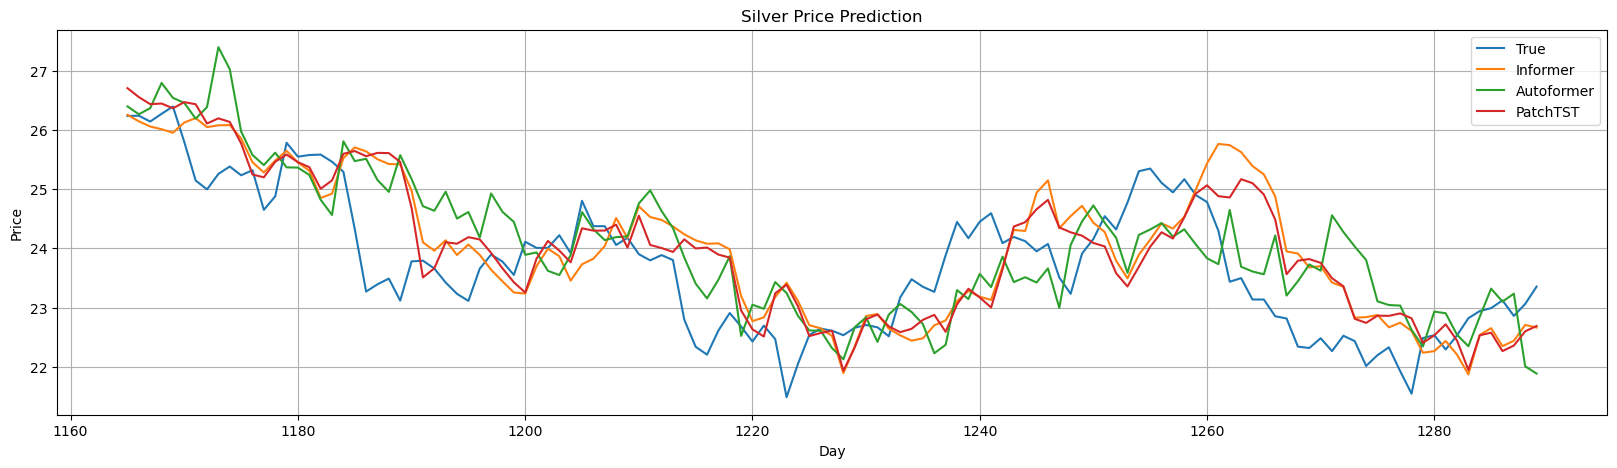

In [37]:
plt.figure(figsize=(20,5))
plt.plot(tf_silver['ds'], tf_silver['y'], label='True')
plt.plot(tf_silver['ds'], tf_silver['Informer'], label='Informer')
plt.plot(tf_silver['ds'], tf_silver['Autoformer'], label='Autoformer')
plt.plot(tf_silver['ds'], tf_silver['PatchTST'], label='PatchTST')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Silver Price Prediction')
plt.grid()
plt.legend()
plt.savefig('silver_tf_5step.png')
plt.show()

In [38]:
mae_lstm = mae(tf_silver['y'], tf_silver['Informer'])
mae_tcn = mae(tf_silver['y'], tf_silver['Autoformer'])
mae_nhits = mae(tf_silver['y'], tf_silver['PatchTST'])

print(f'Informer: {mae_lstm:.3f}')
print(f'Autoformer: {mae_tcn:.3f}')
print(f'PatchTST: {mae_nhits:.3f}')

Informer: 0.772
Autoformer: 0.761
PatchTST: 0.704


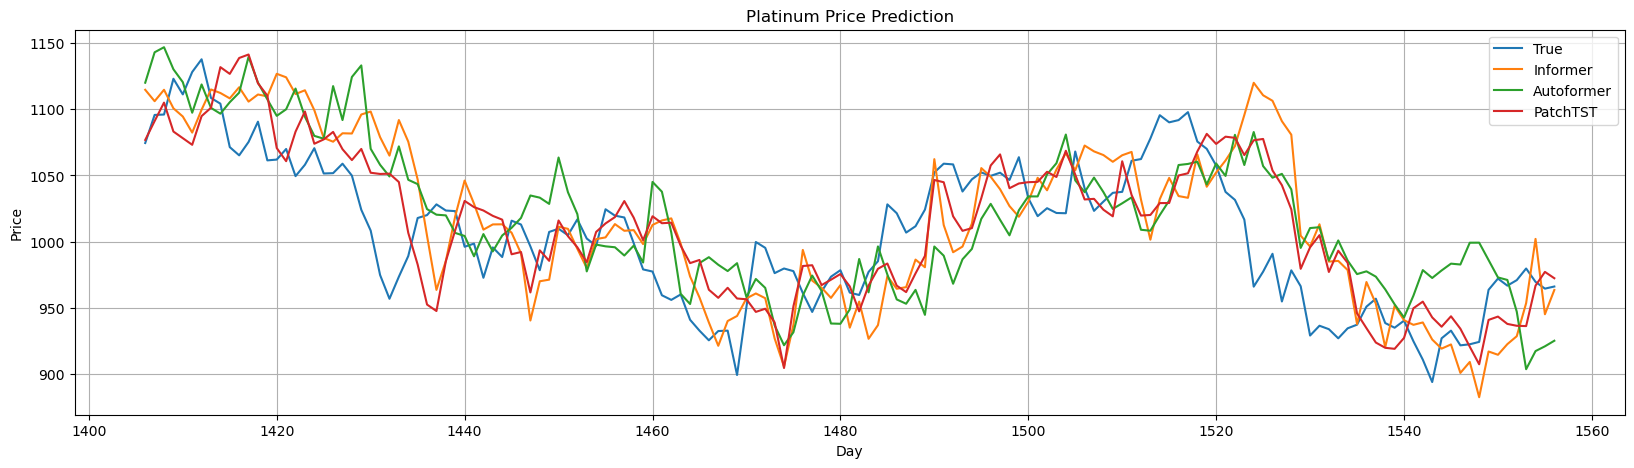

In [39]:
plt.figure(figsize=(20,5))
plt.plot(tf_platinum['ds'], tf_platinum['y'], label='True')
plt.plot(tf_platinum['ds'], tf_platinum['Informer'], label='Informer')
plt.plot(tf_platinum['ds'], tf_platinum['Autoformer'], label='Autoformer')
plt.plot(tf_platinum['ds'], tf_platinum['PatchTST'], label='PatchTST')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Platinum Price Prediction')
plt.grid()
plt.legend()
plt.savefig('platinum_tf_5step.png')
plt.show()

In [40]:
mae_lstm = mae(tf_platinum['y'], tf_platinum['Informer'])
mae_tcn = mae(tf_platinum['y'], tf_platinum['Autoformer'])
mae_nhits = mae(tf_platinum['y'], tf_platinum['PatchTST'])

print(f'Informer: {mae_lstm:.3f}')
print(f'Autoformer: {mae_tcn:.3f}')
print(f'PatchTST: {mae_nhits:.3f}')

Informer: 36.398
Autoformer: 38.618
PatchTST: 31.464
